In [108]:
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [109]:
#Step 1.Load data
df_raw = pd.read_csv("/content/AB_NYC_2019.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [110]:
df_raw.sample(5, random_state=2025)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11913,9277608,Soho 3BR/2BA Everything is just outside your d...,42047615,Jonathan & Nancy,Manhattan,Nolita,40.72347,-73.99302,Entire home/apt,650,3,130,2019-06-05,3.11,2,235
2206,1032127,Short Term Stay in Chelsea/MP NYC,5679237,Renee,Manhattan,Chelsea,40.74583,-74.00363,Entire home/apt,275,7,0,NaN,NaN,1,188
17213,13623700,Spacious and Quiet Gramercy 1 Bedroom,21656569,Alana,Manhattan,Gramercy,40.73577,-73.98057,Entire home/apt,275,5,0,NaN,NaN,1,0
14889,11817955,Artist's Loft - South Park Slope,4629474,Jonathan,Brooklyn,Sunset Park,40.66162,-73.99122,Entire home/apt,179,3,0,NaN,NaN,1,0
43064,33428068,Central Location: Excellent travelers bed,247189581,Helena,Brooklyn,Fort Greene,40.68528,-73.97285,Shared room,32,2,6,2019-06-06,1.78,5,31


Para este analisis estamos tomando en cuenta que el "price" por AirBNB va ser mi variable dependiente de los demas factores que hacen que ese precio sea mas elevado o no. Como podemos ver en el Preprocessing hecho en la siguiente linea, se puede observar como sacamos del dataset columnas que no tienen por que ser relacionadas con el precio, como el ['id','latitude','longitude','last_review','host_id','host_name','name'].

Las columnas restantes, se pueden relacionar con el precio debido a que es información de: dónde se encuentra la vivienda, sus reviews por mes, tipo de cuarto (privado, para familia, etc), numero de habitantes por AirBNB, entre otros.

Naturalmente review_permonth y number_of_reviews estan relacionadas, entonces procedemos a eliminar una de ellas porque para un modelo predictivo puede ocasionar colinealidad.

In [111]:
#Step 2. Preprocessing
df_baking = df_raw.copy()

columns_cat = ['neighbourhood_group','neighbourhood','room_type']
df_baking = df_baking.drop(columns=['id','latitude','longitude','last_review','host_id','host_name','name','reviews_per_month'])

col_log = ['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
df_baking[columns_cat] = df_baking[columns_cat].astype("category")

df_baking = df_baking.dropna()
#Podriamos utilizar esta transformacion para evitar perder el 20% de los datos, pero tendriamos que hacerlos con todas las columnas que le falten datos
#df_baking['reviews_per_month'] = df_baking['reviews_per_month'].fillna(df_baking.groupby('neighbourhood')['reviews_per_month'].transform('mean'))


df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   room_type                       48895 non-null  category
 3   price                           48895 non-null  int64   
 4   minimum_nights                  48895 non-null  int64   
 5   number_of_reviews               48895 non-null  int64   
 6   calculated_host_listings_count  48895 non-null  int64   
 7   availability_365                48895 non-null  int64   
dtypes: category(3), int64(5)
memory usage: 2.1 MB


In [112]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((44005, 8), (4890, 8))

In [113]:
df_train.sample(10, random_state=2025)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
20347,Manhattan,Hell's Kitchen,Entire home/apt,190,4,1,1,0
7370,Brooklyn,Crown Heights,Private room,33,30,1,4,354
3241,Manhattan,East Village,Entire home/apt,189,2,138,1,203
17600,Manhattan,Financial District,Private room,65,30,10,1,0
15082,Manhattan,Harlem,Private room,100,3,4,1,358
32893,Brooklyn,Williamsburg,Private room,75,2,17,5,0
28546,Brooklyn,Williamsburg,Entire home/apt,140,7,0,1,0
11268,Manhattan,Chelsea,Private room,170,2,183,2,254
34300,Brooklyn,East Flatbush,Private room,138,30,13,3,37
34851,Brooklyn,Williamsburg,Private room,63,10,2,1,0


In [114]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
price,44005.0,152.414294,240.844078,0.0,69.0,106.0,175.0,10000.0
minimum_nights,44005.0,7.055925,20.915764,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,44005.0,23.228792,44.441274,0.0,1.0,5.0,23.0,629.0
calculated_host_listings_count,44005.0,7.134553,32.988126,1.0,1.0,1.0,2.0,327.0
availability_365,44005.0,112.808158,131.654252,0.0,0.0,45.0,227.0,365.0


,count,unique,top,freq
neighbourhood_group,44005,5,Manhattan,19461
neighbourhood,44005,221,Williamsburg,3534
room_type,44005,3,Entire home/apt,22874


- Se puede observar como en todas mis variables numéricas existe una dispersión y una desviación entander por encima de la media de los datos.
- En el decribe de las variables categoricas se puede ver como para la variable "neighbourdhood_group" existen 5 grupos distintos en el cual Manhattan es el dato que tiene mas representación porque abarca el +-40% de los datos.
- La variable neighbourhood tiene muchos más valores únicos (217), y Williamsburg es la más frecuente
- room_type tiene 3 valores únicos, siendo Entire home/apt el tipo de propiedad más común.

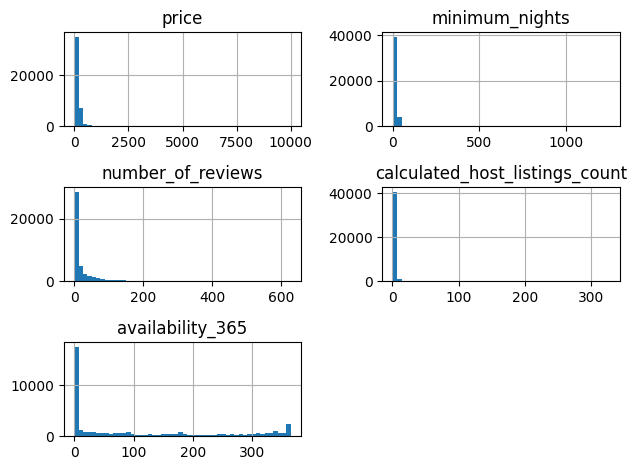

In [115]:
df_train.hist(bins = 50)
plt.tight_layout()
plt.show()

En las graficas se observa como hay outliers que hacen que las graficas se compriman, pero se puede observar por encima que tienen un sesgo positivo, a diferencia de availability_365 que se ve que tiene un poco de sesgo negativo

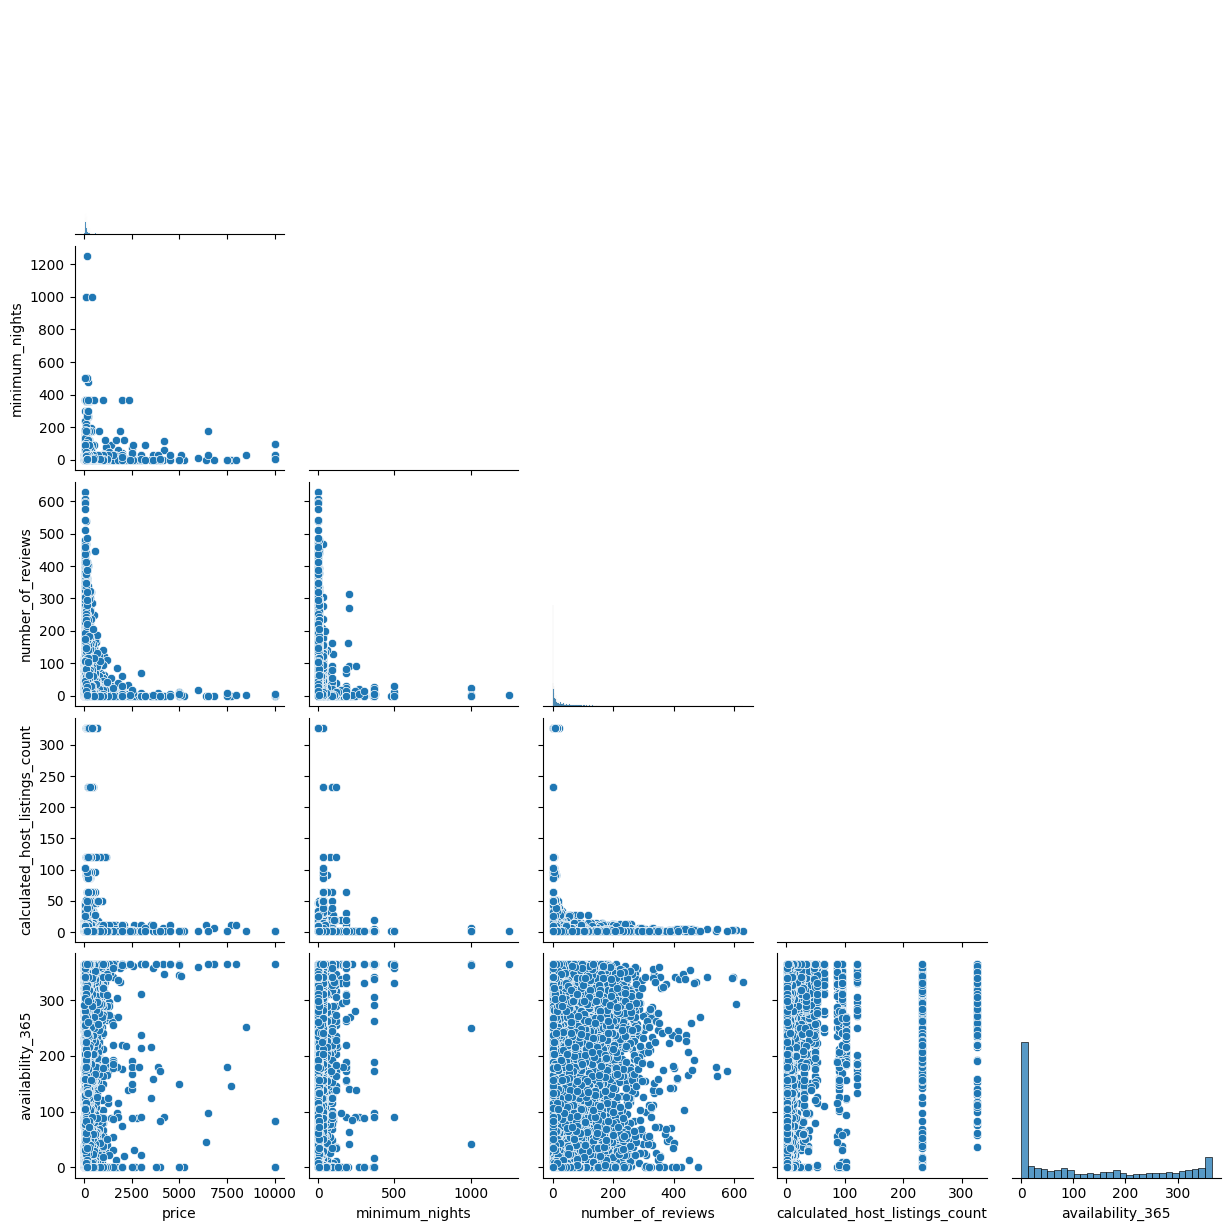

In [116]:
sns.pairplot(df_train, corner= True)
plt.show()

Los datos se ven agrupados siempre en un sector de la gráfica, para eso transformaremos los datos para tener una gráfica más legible a la hora de analizar algún tipo de relación lineal, le sacaremos el logaritmo a las columnas numéricas.

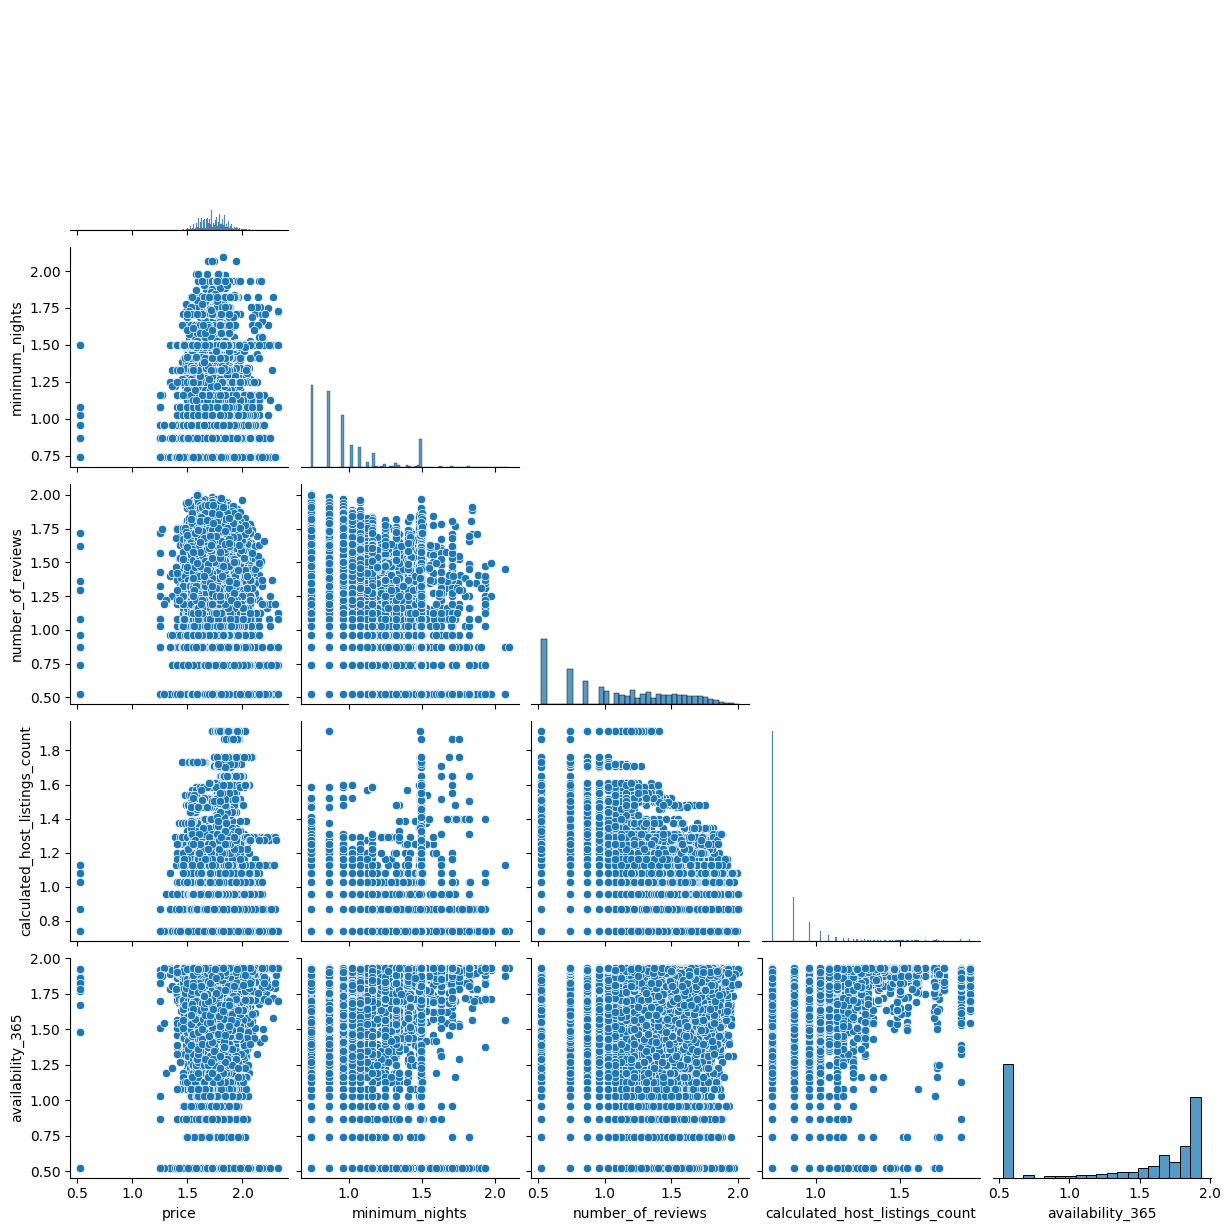

In [126]:
col_num = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
df_train[col_num]=np.log1p(df_train[col_num])

sns.pairplot(df_train, corner=True)
plt.show()

Una vez hecho la transformación podemos observar como no hay una relación lineal entre las variables. Pero si hayamos una relacion cuadratica en la grafica de minimun_nights y number_of_reviews con respecto al precio,donde el rating es mas alto en los precios intermedios. Luego, procedemos hacer un heatmap para cuantificar esa poca relación que tienen los datos.

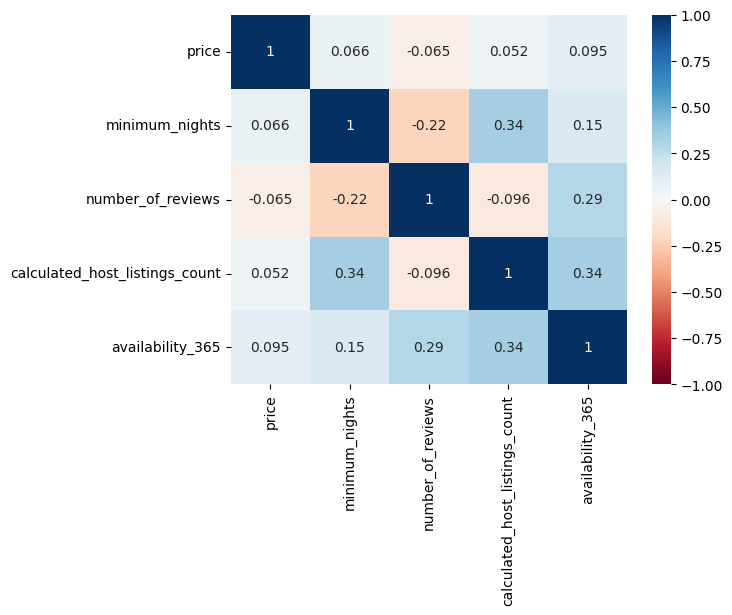

In [119]:
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

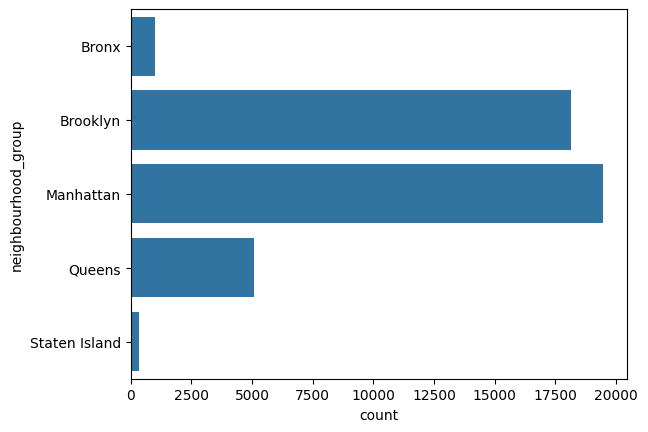

In [120]:
sns.countplot(df_train, y='neighbourhood_group')
plt.show()

Observamos como en Manhattan y en Brooklyn son las ciudades mayormente representadas en este data-set como principales zonas de alquiler de AirBNB

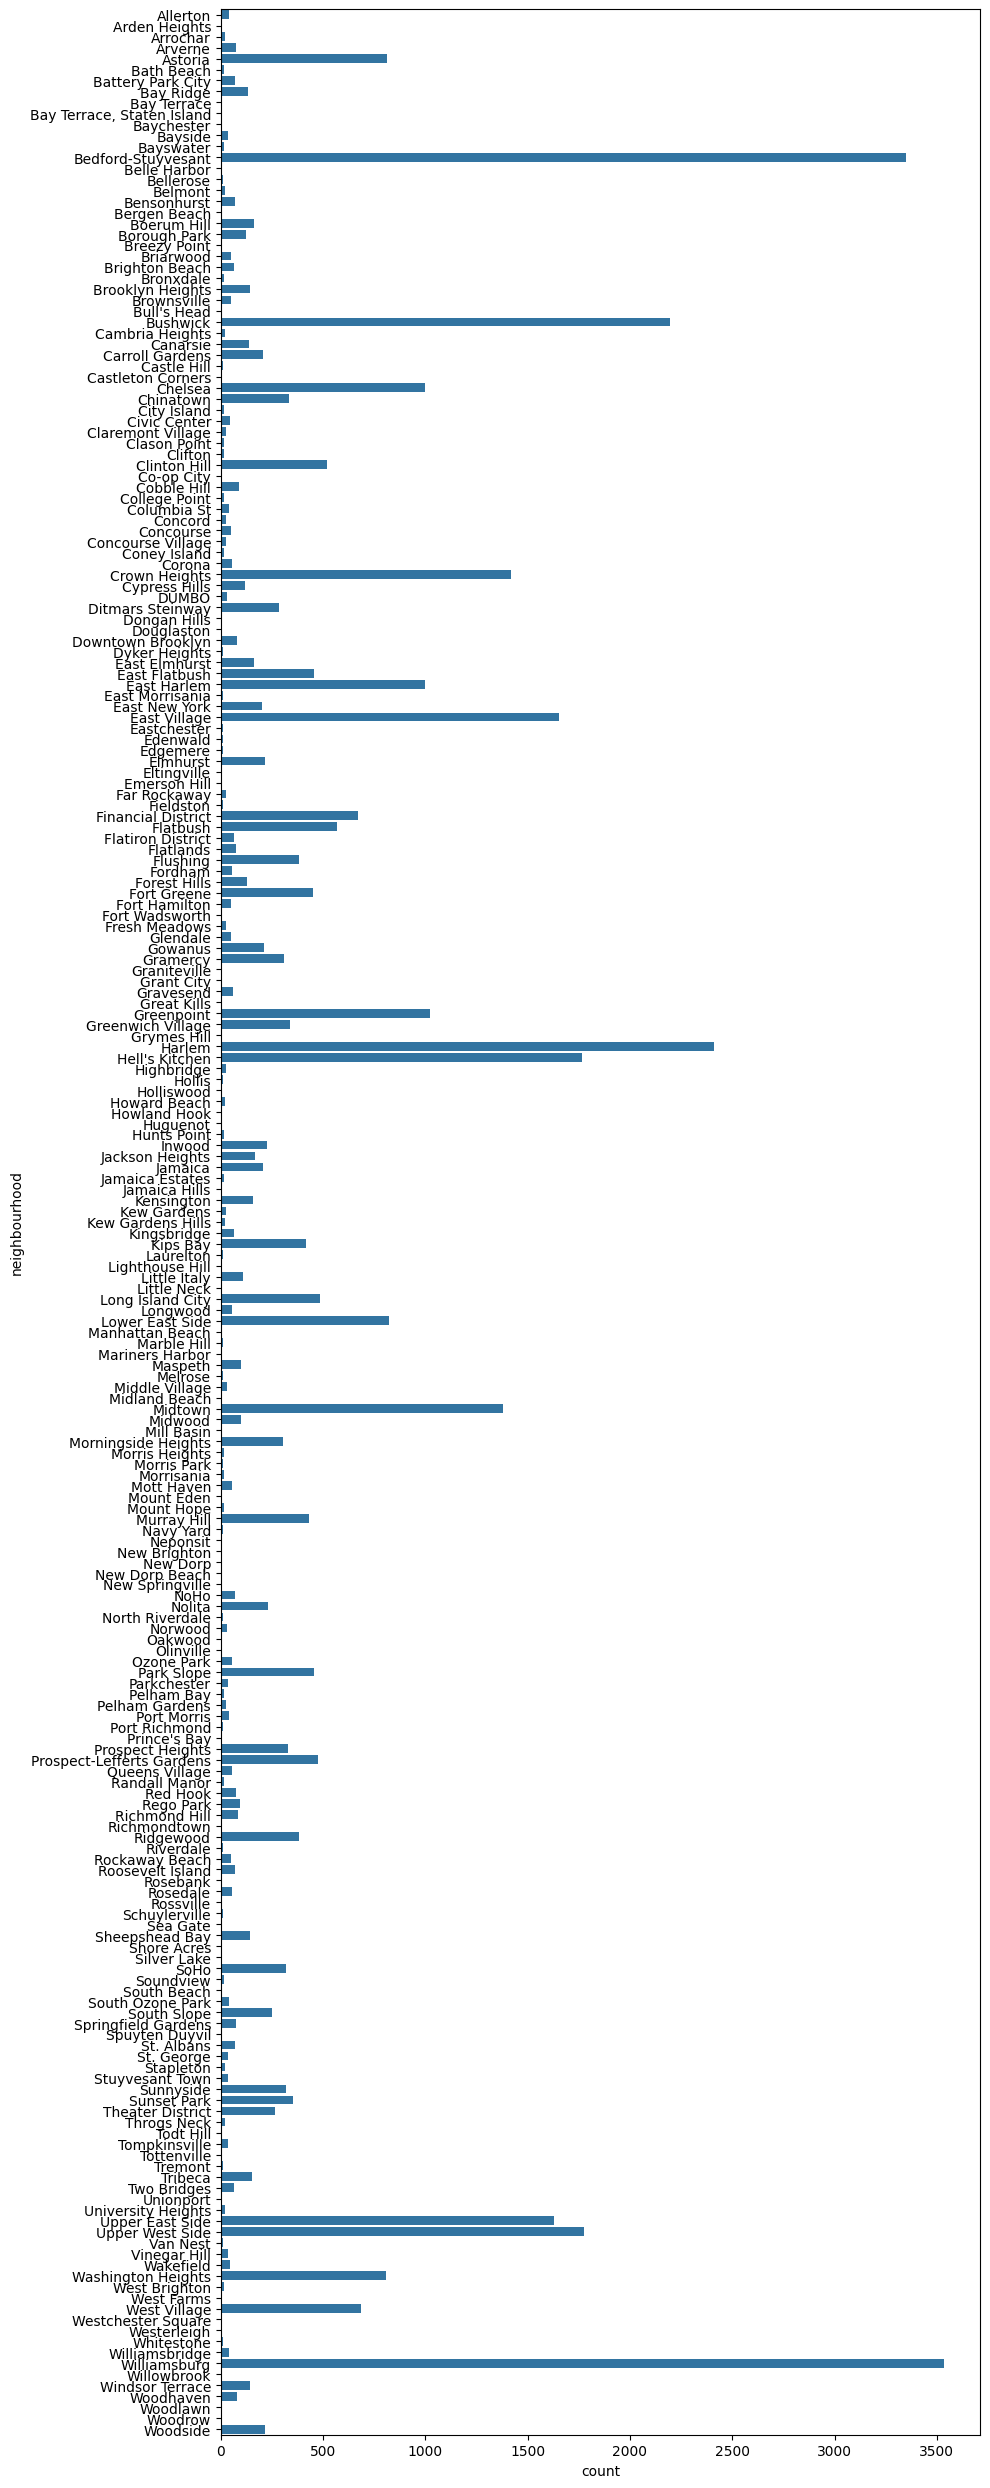

In [121]:
plt.figure(figsize=(10, 25))
sns.countplot(df_train, y='neighbourhood')
plt.tight_layout()
plt.show()

Se observa como Williamsburg y Bedford-Stuyvesant son barrios que tienen una gran representación con respecto a los otros datos.

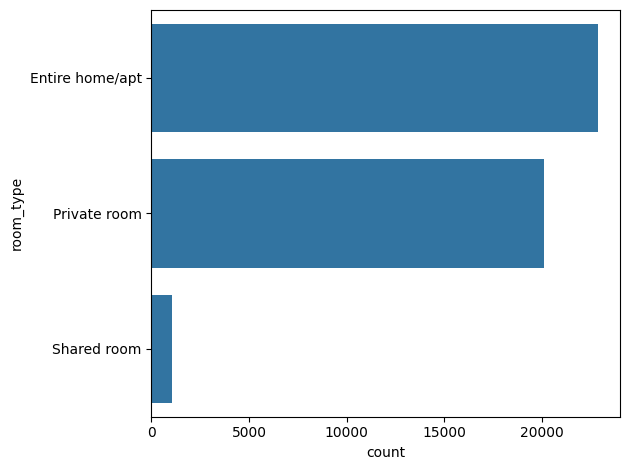

In [122]:
sns.countplot(df_train, y='room_type')
plt.tight_layout()
plt.show()

Tenemos a shared_room como un grupo de datos subrepresentado en cuanto a los room_type
